In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importing all the libraries and installing dependancies

In [2]:
!pip install obonet

In [3]:
!pip install networkx

In [4]:

import networkx
import obonet

In [5]:
import sys, re

Loading the files

In [6]:
df1 = pd.read_csv('train_taxonomy.tsv',sep = '\t')

In [7]:
df2 = pd.read_csv('train_terms.tsv',sep = '\t')

In [8]:
from Bio import SeqIO

In [9]:
df3=open('train_sequences.fasta','r')
lines=df3.readlines()

In [10]:
lines

['>P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1\n',
 'MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNK\n',
 'RVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWN\n',
 'YYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGY\n',
 'HPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY\n',
 '>O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1\n',
 'MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKR\n',
 'NLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAV\n',
 'VSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRR\n',
 'SGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSK\n',
 'YLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCN\n',
 'KTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK\n',
 '>O95231 sp|O95231|VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1\n',
 'MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADF

In [11]:
url = 'go-basic.obo'
graph = obonet.read_obo(url)

In [12]:
len(graph)

43248

In [13]:

graph.number_of_edges()

84805

In [14]:

networkx.is_directed_acyclic_graph(graph)

True

In [15]:
id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}


In [16]:
id_to_name

{'GO:0000001': 'mitochondrion inheritance',
 'GO:0000002': 'mitochondrial genome maintenance',
 'GO:0000003': 'reproduction',
 'GO:0000006': 'high-affinity zinc transmembrane transporter activity',
 'GO:0000007': 'low-affinity zinc ion transmembrane transporter activity',
 'GO:0000009': 'alpha-1,6-mannosyltransferase activity',
 'GO:0000010': 'trans-hexaprenyltranstransferase activity',
 'GO:0000011': 'vacuole inheritance',
 'GO:0000012': 'single strand break repair',
 'GO:0000014': 'single-stranded DNA endodeoxyribonuclease activity',
 'GO:0000015': 'phosphopyruvate hydratase complex',
 'GO:0000016': 'lactase activity',
 'GO:0000017': 'alpha-glucoside transport',
 'GO:0000018': 'regulation of DNA recombination',
 'GO:0000019': 'regulation of mitotic recombination',
 'GO:0000022': 'mitotic spindle elongation',
 'GO:0000023': 'maltose metabolic process',
 'GO:0000024': 'maltose biosynthetic process',
 'GO:0000025': 'maltose catabolic process',
 'GO:0000026': 'alpha-1,2-mannosyltransfera

In [17]:
name_to_id

{'mitochondrion inheritance': 'GO:0000001',
 'mitochondrial genome maintenance': 'GO:0000002',
 'reproduction': 'GO:0000003',
 'high-affinity zinc transmembrane transporter activity': 'GO:0000006',
 'low-affinity zinc ion transmembrane transporter activity': 'GO:0000007',
 'alpha-1,6-mannosyltransferase activity': 'GO:0000009',
 'trans-hexaprenyltranstransferase activity': 'GO:0000010',
 'vacuole inheritance': 'GO:0000011',
 'single strand break repair': 'GO:0000012',
 'single-stranded DNA endodeoxyribonuclease activity': 'GO:0000014',
 'phosphopyruvate hydratase complex': 'GO:0000015',
 'lactase activity': 'GO:0000016',
 'alpha-glucoside transport': 'GO:0000017',
 'regulation of DNA recombination': 'GO:0000018',
 'regulation of mitotic recombination': 'GO:0000019',
 'mitotic spindle elongation': 'GO:0000022',
 'maltose metabolic process': 'GO:0000023',
 'maltose biosynthetic process': 'GO:0000024',
 'maltose catabolic process': 'GO:0000025',
 'alpha-1,2-mannosyltransferase activity': 

In [18]:
#Metadata

In [19]:
graph.graph

{'typedefs': [{'id': 'negatively_regulates',
   'name': 'negatively regulates',
   'namespace': 'external',
   'xref': ['RO:0002212'],
   'is_a': ['regulates']},
  {'id': 'part_of',
   'name': 'part of',
   'namespace': 'external',
   'xref': ['BFO:0000050'],
   'is_transitive': 'true'},
  {'id': 'positively_regulates',
   'name': 'positively regulates',
   'namespace': 'external',
   'xref': ['RO:0002213'],
   'holds_over_chain': ['negatively_regulates negatively_regulates'],
   'is_a': ['regulates']},
  {'id': 'regulates',
   'name': 'regulates',
   'namespace': 'external',
   'xref': ['RO:0002211'],
   'is_transitive': 'true'},
  {'id': 'term_tracker_item',
   'name': 'term tracker item',
   'namespace': 'external',
   'xref': ['IAO:0000233'],
   'is_metadata_tag': 'true',
   'is_class_level': 'true'}],
 'instances': [],
 'format-version': '1.2',
 'data-version': 'releases/2023-01-01',
 'subsetdef': ['chebi_ph7_3 "Rhea list of ChEBI terms representing the major species at pH 7.3."',

In [20]:
df1

EntryID  taxonomyID
0           Q8IXT2        9606
1           Q04418      559292
2           A8DYA3        7227
3           Q9UUI3      284812
4           Q57ZS4      185431
...            ...         ...
142241      Q5TD07        9606
142242      A8BB17        7955
142243  A0A2R8QBB1        7955
142244      P0CT72      284812
142245      Q9NZ43        9606

[142246 rows x 2 columns]

In [21]:
df2

EntryID        term aspect
0        A0A009IHW8  GO:0008152    BPO
1        A0A009IHW8  GO:0034655    BPO
2        A0A009IHW8  GO:0072523    BPO
3        A0A009IHW8  GO:0044270    BPO
4        A0A009IHW8  GO:0006753    BPO
...             ...         ...    ...
5363858      X5L565  GO:0050649    MFO
5363859      X5L565  GO:0016491    MFO
5363860      X5M5N0  GO:0005515    MFO
5363861      X5M5N0  GO:0005488    MFO
5363862      X5M5N0  GO:0003674    MFO

[5363863 rows x 3 columns]

In [22]:
lines

['>P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1\n',
 'MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNK\n',
 'RVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWN\n',
 'YYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGY\n',
 'HPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY\n',
 '>O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1\n',
 'MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKR\n',
 'NLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAV\n',
 'VSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRR\n',
 'SGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSK\n',
 'YLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCN\n',
 'KTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK\n',
 '>O95231 sp|O95231|VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1\n',
 'MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADF

In [23]:
name_to_id

{'mitochondrion inheritance': 'GO:0000001',
 'mitochondrial genome maintenance': 'GO:0000002',
 'reproduction': 'GO:0000003',
 'high-affinity zinc transmembrane transporter activity': 'GO:0000006',
 'low-affinity zinc ion transmembrane transporter activity': 'GO:0000007',
 'alpha-1,6-mannosyltransferase activity': 'GO:0000009',
 'trans-hexaprenyltranstransferase activity': 'GO:0000010',
 'vacuole inheritance': 'GO:0000011',
 'single strand break repair': 'GO:0000012',
 'single-stranded DNA endodeoxyribonuclease activity': 'GO:0000014',
 'phosphopyruvate hydratase complex': 'GO:0000015',
 'lactase activity': 'GO:0000016',
 'alpha-glucoside transport': 'GO:0000017',
 'regulation of DNA recombination': 'GO:0000018',
 'regulation of mitotic recombination': 'GO:0000019',
 'mitotic spindle elongation': 'GO:0000022',
 'maltose metabolic process': 'GO:0000023',
 'maltose biosynthetic process': 'GO:0000024',
 'maltose catabolic process': 'GO:0000025',
 'alpha-1,2-mannosyltransferase activity': 

In [24]:
#DATASET ANALYSIS

In [25]:
df1.shape

(142246, 2)

In [26]:
df2.shape

(5363863, 3)

In [27]:
lines

['>P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1\n',
 'MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNK\n',
 'RVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWN\n',
 'YYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGY\n',
 'HPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY\n',
 '>O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1\n',
 'MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKR\n',
 'NLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAV\n',
 'VSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRR\n',
 'SGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSK\n',
 'YLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCN\n',
 'KTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK\n',
 '>O95231 sp|O95231|VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1\n',
 'MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADF

In [28]:
# Predict all terms/functions/GO Term IDs of protein sequences. 
# One Protein Sequence can have many functions/terms
# This means that the task at hand is a multi-label classification problem

In [29]:
# To train a machine learning model we cannot use the alphabetical protein sequences intrain_sequences.fasta directly. 
# First Convert them into a vector format. 
# In this notebook, we will use embeddings of the protein sequences to train the model. 
# You can think of protein embeddings to be similar to word embeddings us
'''
- The sequences of a protein are given in a FASTA format, which is converted into a vector format
- The now converted vector format is used for training the model and making the predictions
'''

'\n- The sequences of a protein are given in a FASTA format, which is converted into a vector format\n- The now converted vector format is used for training the model and making the predictions\n'

In [30]:
'''
# Protein embeddings Captures protein's structural and functional characteristics.
# Either train custom ML model to learn the protein embeddings of the protein sequences.
# Dataset represents proteins using amino-acid sequences which is a standard approach, Use publicly available pre-trained protein embedding models to generate the embeddings.

# used the precalculated protein embeddings created by Sergei Fironov using the Rost Lab's T5 protein language model.

# The protein embeddings to be used for training are recorded in train_embeddings
'''

"\n# Protein embeddings Captures protein's structural and functional characteristics.\n# Either train custom ML model to learn the protein embeddings of the protein sequences.\n# Dataset represents proteins using amino-acid sequences which is a standard approach, Use publicly available pre-trained protein embedding models to generate the embeddings.\n\n# used the precalculated protein embeddings created by Sergei Fironov using the Rost Lab's T5 protein language model.\n\n# The protein embeddings to be used for training are recorded in train_embeddings\n"

The objective of our model is to predict the terms (functions) of a protein sequence. One protein sequence can have many functions and can thus be classified into any number of terms. Each term is uniquely identified by a GO Term ID. Thus our model has to predict all the GO Term IDs for a protein sequence. This means that the task at hand is a multi-label classification problem

In [31]:
'''
For a protein sequence/ AA sequence, the aim is to predict all the functionalities of the protein
- This means we have to find ALL THE GO TERMS ASSOCIATED WITH THE PROTEIN
'''

'\nFor a protein sequence/ AA sequence, the aim is to predict all the functionalities of the protein\n- This means we have to find ALL THE GO TERMS ASSOCIATED WITH THE PROTEIN\n'

In [32]:
'''
The protein sequences needs to be converted to vector forms
- This is known as protein embeddings
- we convert the sequences to a vector format for making it machine readible, something known as protein embedding
'''

'\nThe protein sequences needs to be converted to vector forms\n- This is known as protein embeddings\n- we convert the sequences to a vector format for making it machine readible, something known as protein embedding\n'

In [33]:
!pip install tensorflow

In [34]:
df2[df2['EntryID']=='A0A009IHW8']

EntryID        term aspect
0        A0A009IHW8  GO:0008152    BPO
1        A0A009IHW8  GO:0034655    BPO
2        A0A009IHW8  GO:0072523    BPO
3        A0A009IHW8  GO:0044270    BPO
4        A0A009IHW8  GO:0006753    BPO
5        A0A009IHW8  GO:1901292    BPO
6        A0A009IHW8  GO:0044237    BPO
7        A0A009IHW8  GO:1901360    BPO
8        A0A009IHW8  GO:0008150    BPO
9        A0A009IHW8  GO:1901564    BPO
10       A0A009IHW8  GO:1901565    BPO
11       A0A009IHW8  GO:0009117    BPO
12       A0A009IHW8  GO:0006139    BPO
13       A0A009IHW8  GO:0044281    BPO
14       A0A009IHW8  GO:0046496    BPO
15       A0A009IHW8  GO:0019362    BPO
16       A0A009IHW8  GO:0046483    BPO
17       A0A009IHW8  GO:0055086    BPO
18       A0A009IHW8  GO:0044248    BPO
19       A0A009IHW8  GO:0019439    BPO
20       A0A009IHW8  GO:0019637    BPO
21       A0A009IHW8  GO:0006807    BPO
22       A0A009IHW8  GO:0019677    BPO
23       A0A009IHW8  GO:1901361    BPO
24       A0A009IHW8  GO:0006163    BPO
25       A0A009IHW8  GO:0046700    BPO
26       A0A009IHW8  GO:0009987    BPO
27       A0A009IHW8  GO:0006725    BPO
28       A0A009IHW8  GO:0006796    BPO
29       A0A009IHW8  GO:0034641    BPO
30       A0A009IHW8  GO:0072521    BPO
31       A0A009IHW8  GO:0071704    BPO
32       A0A009IHW8  GO:0019364    BPO
33       A0A009IHW8  GO:1901575    BPO
34       A0A009IHW8  GO:0072526    BPO
35       A0A009IHW8  GO:0046434    BPO
36       A0A009IHW8  GO:0009166    BPO
37       A0A009IHW8  GO:0072524    BPO
38       A0A009IHW8  GO:0006195    BPO
39       A0A009IHW8  GO:0009056    BPO
40       A0A009IHW8  GO:0044238    BPO
41       A0A009IHW8  GO:0006793    BPO
42       A0A009IHW8  GO:0019674    BPO
4693749  A0A009IHW8  GO:0003674    MFO
4693750  A0A009IHW8  GO:0003953    MFO
4693751  A0A009IHW8  GO:0016787    MFO
4693752  A0A009IHW8  GO:0016799    MFO
4693753  A0A009IHW8  GO:0016798    MFO
4693754  A0A009IHW8  GO:0003824    MFO

In [35]:
name_to_id
#contains the annotations/functions and the related Gene Ontology ID

{'mitochondrion inheritance': 'GO:0000001',
 'mitochondrial genome maintenance': 'GO:0000002',
 'reproduction': 'GO:0000003',
 'high-affinity zinc transmembrane transporter activity': 'GO:0000006',
 'low-affinity zinc ion transmembrane transporter activity': 'GO:0000007',
 'alpha-1,6-mannosyltransferase activity': 'GO:0000009',
 'trans-hexaprenyltranstransferase activity': 'GO:0000010',
 'vacuole inheritance': 'GO:0000011',
 'single strand break repair': 'GO:0000012',
 'single-stranded DNA endodeoxyribonuclease activity': 'GO:0000014',
 'phosphopyruvate hydratase complex': 'GO:0000015',
 'lactase activity': 'GO:0000016',
 'alpha-glucoside transport': 'GO:0000017',
 'regulation of DNA recombination': 'GO:0000018',
 'regulation of mitotic recombination': 'GO:0000019',
 'mitotic spindle elongation': 'GO:0000022',
 'maltose metabolic process': 'GO:0000023',
 'maltose biosynthetic process': 'GO:0000024',
 'maltose catabolic process': 'GO:0000025',
 'alpha-1,2-mannosyltransferase activity': 

In [36]:
#gene ontology contains all the GO ID's and the associated functions of it
#all the functionalities of the protein are plotted and an ID is assigned to it

In [37]:
'''
1) There are 4 train data available: df1, df2, lines and id_to_name
2) The aim is to predict the Gene Ontology ID for the sequences of the proteins given in the test data
3) Thus, as observed, the dataset is highly unstructured
'''

'\n1) There are 4 train data available: df1, df2, lines and id_to_name\n2) The aim is to predict the Gene Ontology ID for the sequences of the proteins given in the test data\n3) Thus, as observed, the dataset is highly unstructured\n'

In [38]:
id_to_name['GO:0044270']

'cellular nitrogen compound catabolic process'

In [39]:
df2

EntryID        term aspect
0        A0A009IHW8  GO:0008152    BPO
1        A0A009IHW8  GO:0034655    BPO
2        A0A009IHW8  GO:0072523    BPO
3        A0A009IHW8  GO:0044270    BPO
4        A0A009IHW8  GO:0006753    BPO
...             ...         ...    ...
5363858      X5L565  GO:0050649    MFO
5363859      X5L565  GO:0016491    MFO
5363860      X5M5N0  GO:0005515    MFO
5363861      X5M5N0  GO:0005488    MFO
5363862      X5M5N0  GO:0003674    MFO

[5363863 rows x 3 columns]

In [40]:
len(id_to_name)

43248

In [41]:
import tensorflow as tf

In [42]:
df1[df1['EntryID']=='4YGM']

Empty DataFrame
Columns: [EntryID, taxonomyID]
Index: []

In [43]:
df1

EntryID  taxonomyID
0           Q8IXT2        9606
1           Q04418      559292
2           A8DYA3        7227
3           Q9UUI3      284812
4           Q57ZS4      185431
...            ...         ...
142241      Q5TD07        9606
142242      A8BB17        7955
142243  A0A2R8QBB1        7955
142244      P0CT72      284812
142245      Q9NZ43        9606

[142246 rows x 2 columns]

In [44]:
import h5py

In [45]:
lines

['>P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1\n',
 'MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNK\n',
 'RVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWN\n',
 'YYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGY\n',
 'HPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY\n',
 '>O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1\n',
 'MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKR\n',
 'NLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAV\n',
 'VSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRR\n',
 'SGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSK\n',
 'YLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCN\n',
 'KTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK\n',
 '>O95231 sp|O95231|VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1\n',
 'MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADF

In [46]:
'''
We have a protein data, containing the protein IDS, taxonomy IDS, GO terms, FASTA sequences and a dataset containing the GO ID and the annotation
'''

'\nWe have a protein data, containing the protein IDS, taxonomy IDS, GO terms, FASTA sequences and a dataset containing the GO ID and the annotation\n'

In [47]:
name_to_id

{'mitochondrion inheritance': 'GO:0000001',
 'mitochondrial genome maintenance': 'GO:0000002',
 'reproduction': 'GO:0000003',
 'high-affinity zinc transmembrane transporter activity': 'GO:0000006',
 'low-affinity zinc ion transmembrane transporter activity': 'GO:0000007',
 'alpha-1,6-mannosyltransferase activity': 'GO:0000009',
 'trans-hexaprenyltranstransferase activity': 'GO:0000010',
 'vacuole inheritance': 'GO:0000011',
 'single strand break repair': 'GO:0000012',
 'single-stranded DNA endodeoxyribonuclease activity': 'GO:0000014',
 'phosphopyruvate hydratase complex': 'GO:0000015',
 'lactase activity': 'GO:0000016',
 'alpha-glucoside transport': 'GO:0000017',
 'regulation of DNA recombination': 'GO:0000018',
 'regulation of mitotic recombination': 'GO:0000019',
 'mitotic spindle elongation': 'GO:0000022',
 'maltose metabolic process': 'GO:0000023',
 'maltose biosynthetic process': 'GO:0000024',
 'maltose catabolic process': 'GO:0000025',
 'alpha-1,2-mannosyltransferase activity': 

# Protein-Sequences: train_sequences.fasta
# train_terms.tsv: Ground truth for the proteins in train_sequences.fasta. 
    # (1)unique protein id
    # (2)GO Term id
    # (3)In which ontology the term appears

# Predict all terms/functions/GO Term IDs of protein sequences. 
# One Protein Sequence can have many functions/terms
# This means that the task at hand is a multi-label classification problem.


# To train a machine learning model we cannot use the alphabetical protein sequences intrain_sequences.fasta directly. 
# First Convert them into a vector format. 
# In this notebook, we will use embeddings of the protein sequences to train the model. 
# You can think of protein embeddings to be similar to word embeddings used to train NLP models.


# Protein embeddings Captures protein's structural and functional characteristics.
# Either train custom ML model to learn the protein embeddings of the protein sequences.
# Dataset represents proteins using amino-acid sequences which is a standard approach, Use publicly available pre-trained protein embedding models to generate the embeddings.

# used the precalculated protein embeddings created by Sergei Fironov using the Rost Lab's T5 protein language model.

# The protein embeddings to be used for training are recorded in train_embeds.n

In [48]:
df1.shape

(142246, 2)

In [49]:
df1['EntryID'].nunique()

142246

In [50]:
df1.nunique()

EntryID       142246
taxonomyID      3156
dtype: int64

In [51]:
df2.value_counts()

EntryID     term        aspect
A0A009IHW8  GO:0003674  MFO       1
Q6NR17      GO:0009987  BPO       1
            GO:0032501  BPO       1
            GO:0032465  BPO       1
            GO:0032153  CCO       1
                                 ..
P23950      GO:0014070  BPO       1
            GO:0012501  BPO       1
            GO:0010948  BPO       1
            GO:0010629  BPO       1
X6RM59      GO:0110165  CCO       1
Name: count, Length: 5363863, dtype: int64

In [52]:
lines

['>P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1\n',
 'MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNK\n',
 'RVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWN\n',
 'YYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGY\n',
 'HPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY\n',
 '>O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1\n',
 'MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKR\n',
 'NLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAV\n',
 'VSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRR\n',
 'SGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSK\n',
 'YLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCN\n',
 'KTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK\n',
 '>O95231 sp|O95231|VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1\n',
 'MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADF

In [53]:
#3 Aspects are involved with a Gene Ontlogy :
# 1 ) MF - Refers to the molecular function, i.e the specific function the protein performs
# 2) Biological Pathway - The pathway in which the protein is involved
# 3) CC - Cellular component - in which component/ part of the cell, the protein is located

In [54]:
!pip install torch
!pip install transformers
!pip install sentencepiece

In [55]:
!pip install requests


In [56]:
import requests
import json

def get_go_annotations(protein_id):
    url = f"https://www.ebi.ac.uk/proteins/api/proteins/{protein_id}/go"
    response = requests.get(url)

    if response.status_code == 200:
        go_data = response.json()
        return go_data
    else:
        print(f"Failed to retrieve GO annotations for {protein_id}. Status code: {response.status_code}")
        return None



In [57]:

# Protein ID for example purposes
protein_id = 'Q8IXT2'

# Get GO annotations for the protein
go_annotations = get_go_annotations(protein_id)

if go_annotations:
    # Print the GO annotations
    for annotation in go_annotations:
        print(f"GO Term: {annotation['goId']}, Term Name: {annotation['name']}")

Failed to retrieve GO annotations for Q8IXT2. Status code: 404


In [58]:
df1

EntryID  taxonomyID
0           Q8IXT2        9606
1           Q04418      559292
2           A8DYA3        7227
3           Q9UUI3      284812
4           Q57ZS4      185431
...            ...         ...
142241      Q5TD07        9606
142242      A8BB17        7955
142243  A0A2R8QBB1        7955
142244      P0CT72      284812
142245      Q9NZ43        9606

[142246 rows x 2 columns]

The train data used here is df2, which contains the protein ID, term as well as aspect

In [59]:
df2

EntryID        term aspect
0        A0A009IHW8  GO:0008152    BPO
1        A0A009IHW8  GO:0034655    BPO
2        A0A009IHW8  GO:0072523    BPO
3        A0A009IHW8  GO:0044270    BPO
4        A0A009IHW8  GO:0006753    BPO
...             ...         ...    ...
5363858      X5L565  GO:0050649    MFO
5363859      X5L565  GO:0016491    MFO
5363860      X5M5N0  GO:0005515    MFO
5363861      X5M5N0  GO:0005488    MFO
5363862      X5M5N0  GO:0003674    MFO

[5363863 rows x 3 columns]

In [60]:
train_terms = pd.read_csv("train_terms.tsv", sep="\t")


Merging and forming a train dataset

In [63]:
train_df_long

EntryID        term aspect  \
0        A0A009IHW8  GO:0008152    BPO   
1        A0A009IHW8  GO:0034655    BPO   
2        A0A009IHW8  GO:0072523    BPO   
3        A0A009IHW8  GO:0044270    BPO   
4        A0A009IHW8  GO:0006753    BPO   
...             ...         ...    ...   
5363858      X5E0F1  GO:0005515    MFO   
5363859      X5E0F1  GO:0003674    MFO   
5363860      X5HMX4  GO:0005515    MFO   
5363861      X5HMX4  GO:0005488    MFO   
5363862      X5HMX4  GO:0003674    MFO   

                                                       Seq  
0        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
1        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
2        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
3        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
4        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
...                                                    ...  
5363858  MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...  
5363859  MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...  
5363860  MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...  
5363861  MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...  
5363862  MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...  

[5363863 rows x 4 columns]

In [62]:

ids = []
seqs = []
with open("train_sequences.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"): #reading the fasta file with protein sequences
        # iterates through the fasta seq step by step and assigns the protein ID to each sequence and appends the same
        ids.append(record.id)#appending and extracting the protein ID for the fasta sequence given
        seqs.append(str(record.seq)) #appending and extracting the sequence [FASTA]
train_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs}) #converting the info into a dataframe
train_df_long = train_terms.merge(train_seqs_df, on='EntryID') #merging the info with the train_terms.tsv dataset

In [ ]:
lines

# data at hand - df1, df2, lines, names_to_id
# we are merging training data into a single file - train_df_long

In [64]:
train_df_long[train_df_long['Seq']=='MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNKRVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWNYYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGYHPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY']

EntryID        term aspect  \
1523537  P20536  GO:0008152    BPO   
1523538  P20536  GO:0071897    BPO   
1523539  P20536  GO:0044249    BPO   
1523540  P20536  GO:0006259    BPO   
1523541  P20536  GO:0009059    BPO   
1523542  P20536  GO:0009987    BPO   
1523543  P20536  GO:1901362    BPO   
1523544  P20536  GO:0009058    BPO   
1523545  P20536  GO:0044271    BPO   
1523546  P20536  GO:0006725    BPO   
1523547  P20536  GO:0034641    BPO   
1523548  P20536  GO:0044237    BPO   
1523549  P20536  GO:1901360    BPO   
1523550  P20536  GO:0008150    BPO   
1523551  P20536  GO:1901576    BPO   
1523552  P20536  GO:0019058    BPO   
1523553  P20536  GO:0071704    BPO   
1523554  P20536  GO:0039693    BPO   
1523555  P20536  GO:0006139    BPO   
1523556  P20536  GO:0044260    BPO   
1523557  P20536  GO:0090304    BPO   
1523558  P20536  GO:0043170    BPO   
1523559  P20536  GO:0046483    BPO   
1523560  P20536  GO:0034654    BPO   
1523561  P20536  GO:0019438    BPO   
1523562  P20536  GO:0018130    BPO   
1523563  P20536  GO:0016032    BPO   
1523564  P20536  GO:0044238    BPO   
1523565  P20536  GO:0006807    BPO   
1523566  P20536  GO:0019079    BPO   
1523567  P20536  GO:0005515    MFO   
1523568  P20536  GO:0005488    MFO   
1523569  P20536  GO:0003674    MFO   

                                                       Seq  
1523537  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523538  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523539  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523540  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523541  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523542  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523543  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523544  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523545  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523546  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523547  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523548  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523549  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523550  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523551  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523552  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523553  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523554  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523555  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523556  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523557  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523558  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523559  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523560  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523561  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523562  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523563  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523564  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523565  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523566  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523567  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523568  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...  
1523569  MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...

In [65]:
train_df_long['Seq']

0          MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
1          MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
2          MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
3          MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
4          MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
                                 ...                        
5363858    MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...
5363859    MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...
5363860    MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...
5363861    MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...
5363862    MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...
Name: Seq, Length: 5363863, dtype: object

In [66]:
#Hence, the train data we constructed was : train_df_long

In [67]:
train_df_long.shape

(5363863, 4)

In [68]:
train_df_long.columns

Index(['EntryID', 'term', 'aspect', 'Seq'], dtype='object')

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from Bio import SeqIO


In [70]:
train_df_long

EntryID        term aspect  \
0        A0A009IHW8  GO:0008152    BPO   
1        A0A009IHW8  GO:0034655    BPO   
2        A0A009IHW8  GO:0072523    BPO   
3        A0A009IHW8  GO:0044270    BPO   
4        A0A009IHW8  GO:0006753    BPO   
...             ...         ...    ...   
5363858      X5E0F1  GO:0005515    MFO   
5363859      X5E0F1  GO:0003674    MFO   
5363860      X5HMX4  GO:0005515    MFO   
5363861      X5HMX4  GO:0005488    MFO   
5363862      X5HMX4  GO:0003674    MFO   

                                                       Seq  
0        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
1        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
2        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
3        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
4        MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
...                                                    ...  
5363858  MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...  
5363859  MNKKTKLIHGGHTTDDYTGAVTTPIYQTSTYLQDDIGDLRQGYEYS...  
5363860  MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...  
5363861  MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...  
5363862  MGVTGILQLPRDRFKRTSFFLWVIILFQRTFSIPLGVIHNSTLQVS...  

[5363863 rows x 4 columns]

In [71]:
import pandas as pd

# Assuming train_df_long is your DataFrame
# Make sure train_df_long is properly defined before executing this code

# Save the DataFrame to a CSV file named "data_proten.csv"
train_df_long.to_csv('data_proten.csv', index=False)

print("DataFrame saved to data_proten.csv")


DataFrame saved to data_proten.csv


In [72]:
train_df_long[train_df_long['EntryID']=='A0A009IHW8']

EntryID        term aspect  \
0   A0A009IHW8  GO:0008152    BPO   
1   A0A009IHW8  GO:0034655    BPO   
2   A0A009IHW8  GO:0072523    BPO   
3   A0A009IHW8  GO:0044270    BPO   
4   A0A009IHW8  GO:0006753    BPO   
5   A0A009IHW8  GO:1901292    BPO   
6   A0A009IHW8  GO:0044237    BPO   
7   A0A009IHW8  GO:1901360    BPO   
8   A0A009IHW8  GO:0008150    BPO   
9   A0A009IHW8  GO:1901564    BPO   
10  A0A009IHW8  GO:1901565    BPO   
11  A0A009IHW8  GO:0009117    BPO   
12  A0A009IHW8  GO:0006139    BPO   
13  A0A009IHW8  GO:0044281    BPO   
14  A0A009IHW8  GO:0046496    BPO   
15  A0A009IHW8  GO:0019362    BPO   
16  A0A009IHW8  GO:0046483    BPO   
17  A0A009IHW8  GO:0055086    BPO   
18  A0A009IHW8  GO:0044248    BPO   
19  A0A009IHW8  GO:0019439    BPO   
20  A0A009IHW8  GO:0019637    BPO   
21  A0A009IHW8  GO:0006807    BPO   
22  A0A009IHW8  GO:0019677    BPO   
23  A0A009IHW8  GO:1901361    BPO   
24  A0A009IHW8  GO:0006163    BPO   
25  A0A009IHW8  GO:0046700    BPO   
26  A0A009IHW8  GO:0009987    BPO   
27  A0A009IHW8  GO:0006725    BPO   
28  A0A009IHW8  GO:0006796    BPO   
29  A0A009IHW8  GO:0034641    BPO   
30  A0A009IHW8  GO:0072521    BPO   
31  A0A009IHW8  GO:0071704    BPO   
32  A0A009IHW8  GO:0019364    BPO   
33  A0A009IHW8  GO:1901575    BPO   
34  A0A009IHW8  GO:0072526    BPO   
35  A0A009IHW8  GO:0046434    BPO   
36  A0A009IHW8  GO:0009166    BPO   
37  A0A009IHW8  GO:0072524    BPO   
38  A0A009IHW8  GO:0006195    BPO   
39  A0A009IHW8  GO:0009056    BPO   
40  A0A009IHW8  GO:0044238    BPO   
41  A0A009IHW8  GO:0006793    BPO   
42  A0A009IHW8  GO:0019674    BPO   
43  A0A009IHW8  GO:0003674    MFO   
44  A0A009IHW8  GO:0003953    MFO   
45  A0A009IHW8  GO:0016787    MFO   
46  A0A009IHW8  GO:0016799    MFO   
47  A0A009IHW8  GO:0016798    MFO   
48  A0A009IHW8  GO:0003824    MFO   

                                                  Seq  
0   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
1   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
2   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
3   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
4   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
5   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
6   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
7   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
8   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
9   MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
10  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
11  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
12  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
13  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
14  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
15  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
16  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
17  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
18  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
19  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
20  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
21  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
22  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
23  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
24  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
25  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
26  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
27  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
28  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
29  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
30  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
31  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
32  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
33  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
34  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
35  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
36  MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...  
37  MSLEQKKGADIISKILQIQNSIGK

# Gene Ontology Data Analysis

In [73]:
import random

In [74]:
# Randomly select a  node
random_node = random.choice(list(graph))
random_node, id_to_name[random_node]

('GO:1904482', 'cellular response to tetrahydrofolate')

In [75]:

# Find edges to parent terms
for child, parent, key in graph.out_edges(random_node, keys=True):
    print(f'• {id_to_name[child]} ⟶ {key} ⟶ {id_to_name[parent]}')

• cellular response to tetrahydrofolate ⟶ is_a ⟶ cellular response to organonitrogen compound
• cellular response to tetrahydrofolate ⟶ is_a ⟶ cellular response to oxygen-containing compound
• cellular response to tetrahydrofolate ⟶ is_a ⟶ response to tetrahydrofolate


In [76]:

# Find edges to children terms
node = name_to_id['pilus']
for parent, child, key in graph.in_edges(random_node, keys=True):
    print(f'• {id_to_name[child]} ⟵ {key} ⟵ {id_to_name[parent]}')

In [77]:

# Find all superterms
sorted(id_to_name[superterm] for superterm in networkx.descendants(graph, random_node))


['biological_process',
 'cellular process',
 'cellular response to chemical stimulus',
 'cellular response to endogenous stimulus',
 'cellular response to nitrogen compound',
 'cellular response to organic substance',
 'cellular response to organonitrogen compound',
 'cellular response to oxygen-containing compound',
 'cellular response to stimulus',
 'response to chemical',
 'response to endogenous stimulus',
 'response to nitrogen compound',
 'response to organic substance',
 'response to organonitrogen compound',
 'response to oxygen-containing compound',
 'response to stimulus',
 'response to tetrahydrofolate']

In [78]:

sorted(id_to_name[subterm] for subterm in networkx.ancestors(graph, random_node))
#Finding all the subterms and superterms

[]

In [79]:

# Find all paths to the root
paths = networkx.all_simple_paths(
    graph,
    source=random_node,
    target=name_to_id['biological_process']
)
for pth in paths:
    print('•', ' ⟶ '.join(id_to_name[node] for node in pth))

• cellular response to tetrahydrofolate ⟶ cellular response to organonitrogen compound ⟶ response to organonitrogen compound ⟶ response to organic substance ⟶ response to chemical ⟶ response to stimulus ⟶ biological_process
• cellular response to tetrahydrofolate ⟶ cellular response to organonitrogen compound ⟶ response to organonitrogen compound ⟶ response to nitrogen compound ⟶ response to chemical ⟶ response to stimulus ⟶ biological_process
• cellular response to tetrahydrofolate ⟶ cellular response to organonitrogen compound ⟶ cellular response to organic substance ⟶ response to organic substance ⟶ response to chemical ⟶ response to stimulus ⟶ biological_process
• cellular response to tetrahydrofolate ⟶ cellular response to organonitrogen compound ⟶ cellular response to organic substance ⟶ cellular response to chemical stimulus ⟶ response to chemical ⟶ response to stimulus ⟶ biological_process
• cellular response to tetrahydrofolate ⟶ cellular response to organonitrogen compound ⟶ 

In [80]:
# ANALYSING THE FASTA FILE 

In [81]:
def load_sequences(fasta_file):
    sequences = {}
    current_id = None
    with open(fasta_file, 'rt') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                # Extract the protein identifier from the line
                identifier = line[1:].split()[0]
                current_id = identifier
                sequences[current_id] = ''
            else:
                sequences[current_id] += line

    # Print number of protein sequences
    print(str(len(sequences)) + ' ids loaded.')
    return sequences

In [82]:

train_file = 'train_sequences.fasta'
train_sequences = load_sequences(train_file)

142246 ids loaded.


In [83]:

train_alphabet = list(set(''.join(train_sequences.values())))
print(f'Number of aminoacids: {len(train_alphabet)}, aminoacids: {"".join(sorted(train_alphabet))}')
#Returns the number of Amino acids

Number of aminoacids: 25, aminoacids: ABCDEFGHIKLMNOPQRSTUVWXYZ


In [84]:
#Analysing the sequence length

In [85]:
import matplotlib.pyplot as plt

sequence_lengths = [len(sequence) for sequence in train_sequences.values()]

print(f'Max: {max(sequence_lengths)}, min: {min(sequence_lengths)}.')


Max: 35375, min: 3.


In [86]:
#Plotting the same visually

In [87]:
seq = list(sequence_lengths)

In [88]:
seq

[218,
 354,
 258,
 415,
 415,
 288,
 655,
 3333,
 390,
 1295,
 203,
 419,
 480,
 498,
 344,
 434,
 2522,
 319,
 935,
 490,
 699,
 1105,
 268,
 372,
 243,
 522,
 419,
 464,
 327,
 1170,
 558,
 848,
 734,
 268,
 44,
 464,
 320,
 102,
 203,
 61,
 289,
 343,
 169,
 259,
 1692,
 182,
 723,
 471,
 1823,
 95,
 134,
 599,
 354,
 132,
 360,
 313,
 2319,
 246,
 737,
 1042,
 496,
 376,
 742,
 219,
 678,
 520,
 771,
 125,
 362,
 559,
 164,
 534,
 154,
 523,
 222,
 169,
 349,
 323,
 423,
 487,
 219,
 115,
 679,
 1321,
 280,
 198,
 492,
 112,
 302,
 399,
 693,
 1216,
 606,
 288,
 409,
 75,
 661,
 273,
 624,
 436,
 685,
 361,
 310,
 218,
 351,
 92,
 435,
 324,
 332,
 601,
 156,
 288,
 358,
 354,
 109,
 425,
 333,
 283,
 220,
 1193,
 560,
 1141,
 1257,
 86,
 460,
 277,
 118,
 407,
 685,
 620,
 165,
 930,
 332,
 549,
 336,
 511,
 351,
 295,
 479,
 403,
 405,
 36,
 347,
 211,
 475,
 184,
 2028,
 459,
 308,
 2136,
 305,
 931,
 707,
 151,
 613,
 527,
 145,
 207,
 320,
 52,
 172,
 450,
 449,
 249,
 1194,
 

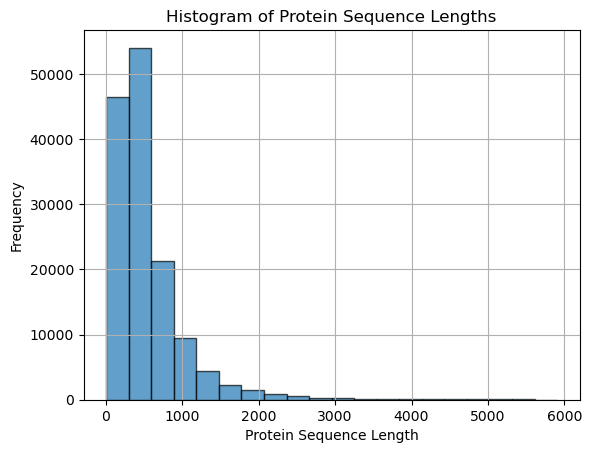

In [89]:

# Plot the histogram
plt.hist([x for x in sequence_lengths if x < 6000], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Protein Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Protein Sequence Lengths')
plt.grid(True)
plt.show()


In [90]:
#Max number of sequences lie in the range of 0-1000, ie max number of proteins have their length between 0-1000

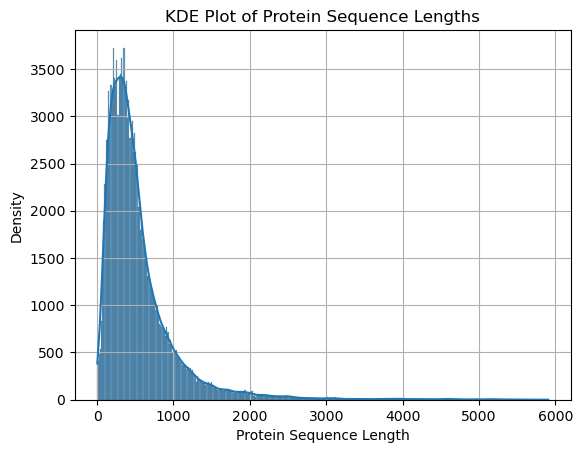

In [91]:

sns.histplot([x for x in sequence_lengths if x < 6000], kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('Protein Sequence Length')
plt.ylabel('Density')
plt.title('KDE Plot of Protein Sequence Lengths')
plt.grid(True)
plt.show()

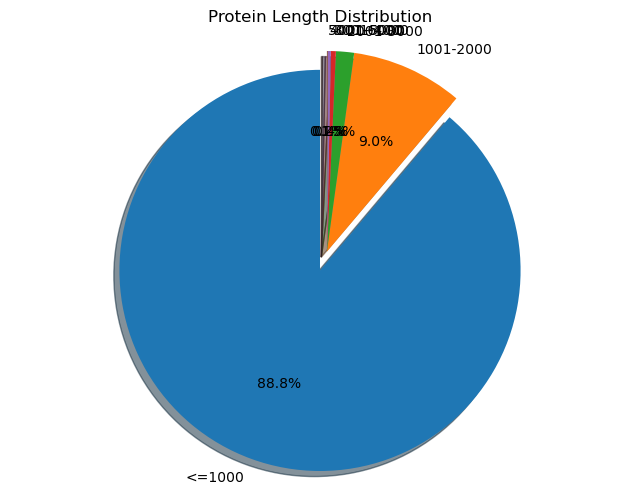

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Sample protein sequence lengths (replace this with your actual dataset)
sequence_lengths

# Define bins for protein length categories
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['<=1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000']

# Categorize the protein lengths into bins and count the number of proteins in each bin
protein_counts, _ = np.histogram(sequence_lengths, bins=bins)

# Determine which slice to explode (highlighted)
explode = (0.1, 0, 0, 0, 0, 0)  # Explode the first slice (<=1000)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(protein_counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Protein Length Distribution')
plt.show()


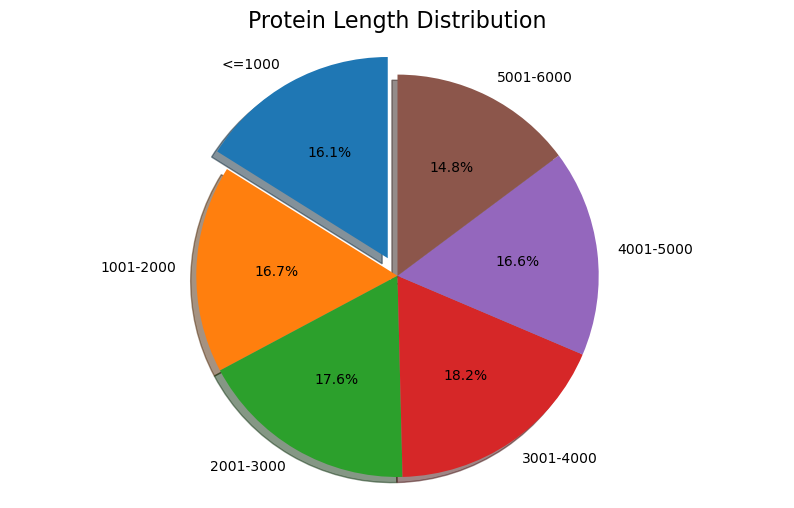

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Sample protein sequence lengths (replace this with your actual dataset)
sequence_lengths = np.random.randint(50, 6000, 1000)

# Define bins for protein length categories
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000]
labels = ['<=1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000']

# Categorize the protein lengths into bins and count the number of proteins in each bin
protein_counts, _ = np.histogram(sequence_lengths, bins=bins)

# Determine which slice to explode (highlighted)
explode = (0.1, 0, 0, 0, 0, 0)  # Explode the first slice (<=1000)

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(protein_counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Protein Length Distribution', fontsize=16)

# Adjust the font size of the labels
for label in plt.gca().get_xticklabels():
    label.set_fontsize(12)

plt.show()


In [94]:
lines

['>P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1\n',
 'MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNK\n',
 'RVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWN\n',
 'YYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGY\n',
 'HPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY\n',
 '>O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1\n',
 'MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKR\n',
 'NLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAV\n',
 'VSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRR\n',
 'SGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSK\n',
 'YLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCN\n',
 'KTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK\n',
 '>O95231 sp|O95231|VENTX_HUMAN Homeobox protein VENTX OS=Homo sapiens OX=9606 GN=VENTX PE=1 SV=1\n',
 'MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADF

Analysing the FASTA sequences

In [95]:
!pip install biopython

In [96]:
from Bio import SeqIO


if __name__ == '__main__':
    idx = 0
    for sequence in SeqIO.parse('train_sequences.fasta','fasta'):
        print(sequence.id)
        print(sequence.seq)
        print('No of nucleotides: {}'.format(len(sequence)))
        idx+=1

    print('Total Sequence found {}'.format(idx))

P20536
MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNKRVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWNYYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGYHPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY
No of nucleotides: 218
O73864
MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKRNLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAVVSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRRSGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSKYLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCNKTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK
No of nucleotides: 354
O95231
MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLPGPGQTSGAREPPQAVSIKEAAGSSNLPAPERTMAGLSKEPNTLRAPRVRTAFTMEQVRTLEGVFQHHQYLSPLERKRLAREMQLSEVQIKTWFQNRRMKHKRQMQDPQLHSPFSGSLHAPPAFYSTSSGLANGLQLLCPWAPLSGPQALMLPPGSFWGLCQVAQEALASAGASCCGQPLASHPPTPGRPSLGPALSTGPRGLCAMPQTGDAF
No of nucleotides: 258
A0A0B4J1F4
MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEPVALRGLRLEAQGRATSAWGP

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Q567M5
MAFHGSTRPTVCGNLFPASELGHKYFCVNTTAGTTSTGLGATPNPTGPNAPAGTPRHPASLGGSAGGGAAIPQPHSNPASEVPSPAEMEPDRPIGYGAFGVVWSVTDPRDGRKVALKKMPNVFQNLVSCKRVFRELRMLCFFKHDNVLSALDILQPPQIDCFEEIYVITELMQSDLHKVIVSPQPLTTDHIKVFLYQILRGLKYLHSAGILHRDIKPGNLLVNSNCLLKICDFGLARVEEPDPSRHMTQEVVTQYYRAPEVLMGCQHYTSSIDVWSVGCIFAELLGRRILFQAQSPIQQVMMDTSFKGLKILAFLQDVKYVLVSSRKCQ
No of nucleotides: 329
Q6DHK7
MNSGGRRLKQWLIEQINSNIYNGLQWEDEDRTMFRIPWKHAGKQDYNQEVDASIFKAWAIFKGKFKEGDKAEPATWKTRLRCALNKSPDFEEVTDRSQLDISEPYKVYRIVPEEEQKLGKGTVTTVKDTTDMDCSPDLDEIIKESSNDEYMGILRSSHSPLDERSSMPSVQEWWQQGPLNAAVVHQDPAGSLNSAFSQMLISFYYGGQMVDNMVTTHPEGCRISPCLPSTANGFLYGSDSLQNIYFPSIDGIKNERQRHVTRKLFSHLERGVLLRANREGIFIKRLCQSRVFWIGQDARYNPCKLERDAVVKIFDTARFLQALQLYQDGHYQAPEPTVTLCFGEEFNDFSTVKSKLIIVEITAWNCQQLLNAVTARRTQCSSGNMEISDNLVSDQMACIYQDLCSYPVPPRASCFRDNLQIPV
No of nucleotides: 423
I2AVV9
MEFNLPPYLLQAARCKLEPISSADCGYFSACGSLSPSSSIDSGCFSPPWGAGRQLEGPENANVDCLQAKKLKLALPVDSKRRSRSKNPGMKRQSASEREKLRMRDLTKALHHLRSFLPPSVAPAGQTLTKIETLRLAISYISHLSDQLRQAEVPNYEMCCSAEASDRFQSGLVFENVCM

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A0A0G2JV76
MTLAFKTLFPRNLCALGRKELCLFSEQHHWPAIRQFSQWSETNLLCGCCLLQRRKPVLSFQRGHLRPRATHLISWSGSHVGLCTGPCEMAEQRFCVDYAKRGTAGCKKCKEKIVKGVCRIGKVVPNPFSESGGDMKEWYHIKCMFEKLERARATTKKIEDLTELEGWEELEDNEKEQISQHIADLSSKTAATPKKKATVQAKLTTTGQVTSPVKGASFITSTNPRKFSGFSAAKPNNSEQDPSSPAPKTSLSASKCDPKHKDCLLREFRKLCAMVAENPSYNTKTQIIHDFLQKGSTGDGFRGDVYLTVKLLLPGVIKSVYNLNDKQIVKLFSRIFNCNPDDMARDLEQGDVSETIRVFFEQSKSFPPAAKSLLTIQEVDAFLLHLSKLTKEDEQQQALQDIASRCTANDLKCIIRLIKHDLKMNSGAKHVLDALDPNAYEAFKASRNLQDVVERVLHNEQEVEKDPGRRRALSVQASLMTPVQPMLAEACKSIEYAMKKCPNGMFSEIKYDGERVQVHKKGDHFSYFSRSLKPVLPHKVAHFKDYIPKAFPGGQSMILDSEVLLIDNNTGKPLPFGTLGVHKKAAFQDANVCLFVFDCIYFNDVSLMDRPLCERRKFLHDNMVEIRNRIMFSEMKQVTKASDLADMINRVIREGLEGLVLKDVKGTYEPGKRHWLKVKKDYLNEGAMADTADLVVLGAFYGQGSKGGMMSIFLMGCYDPDSQKWCTVTKCAGGHDDATLARLQKELDMVKISKDPSKIPSWLKINKIYYPDFIVPDPKKAAVWEITGAEFSRSEAHTADGISIRFPRCTRIRDDKDWKSATNLPQLKELYQLSKDKADFAVVAGDEGSSTTGGSNGENEGTAGSTVPRKGPKGPPSKSSASAKKTEQKLNDPSSRGGNTLIPKLSPMKPGEKLAVKSSPVKVGMKRKAADETPGLTKALLDVFTGVRLYLPPSTPDFRRLKRYFVAFNGDLVQEFDMASATHVLGNRD

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
if __name__ == '__main__':
    idx = 0
    for sequence in SeqIO.parse('train_sequences.fasta','fasta'):
        print(sequence.id)
        print(sequence.seq)
        print('No of Amino Acid: {}'.format(len(sequence)))
        idx+=1

    print('Total Sequence found {}'.format(idx))
    # Gives the ID, the main sequence as well as the length of all the amino acids present in the sequence

P20536
MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLKQPLRNKRVCVCGIDPYPKDGTGVPFESPNFTKKSIKEIASSISRLTGVIDYKGYNLNIIDGVIPWNYYLSCKLGETKSHAIYWDKISKLLLQHITKHVSVLYCLGKTDFSNIRAKLESPVTTIVGYHPAARDRQFEKDRSFEIINVLLELDNKVPINWAQGFIY
No of Amino Acid: 218
O73864
MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKRNLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAVVSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRRSGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSKYLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCNKTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK
No of Amino Acid: 354
O95231
MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLPGPGQTSGAREPPQAVSIKEAAGSSNLPAPERTMAGLSKEPNTLRAPRVRTAFTMEQVRTLEGVFQHHQYLSPLERKRLAREMQLSEVQIKTWFQNRRMKHKRQMQDPQLHSPFSGSLHAPPAFYSTSSGLANGLQLLCPWAPLSGPQALMLPPGSFWGLCQVAQEALASAGASCCGQPLASHPPTPGRPSLGPALSTGPRGLCAMPQTGDAF
No of Amino Acid: 258
A0A0B4J1F4
MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEPVALRGLRLEAQGRATSAWGPSAG

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [98]:
#The protein sequences in the FASTA file, are all available too in the main train file, Hence, we will have to
# analyse the FASTA file, same conclusions can be drawn to the sequences present in the main train file

In [99]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [100]:

X = ProteinAnalysis("MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV")

In [101]:
pro_seq_list = list(train_df_long['Seq'])

In [102]:
l = [] #Gives the count of 'A' in the individual sequneces
for i in pro_seq_list:
    x = ProteinAnalysis(i)
    l.append([x.count_amino_acids()['A'],i])

    

    
    #Contains a single sequence at a time

In [103]:
l


[[11,
  'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 [11,
  'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 [11,
  'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 [11,
  'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASED

In [104]:
# USING DAMBE FOR DATA ANALYSIS